In [29]:
import os, pickle
import matplotlib.pyplot as plt
import numpy as np
from random import randint, sample
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

### Samples needed for Sampling all objects from the Cars dataset (Tests=100000)

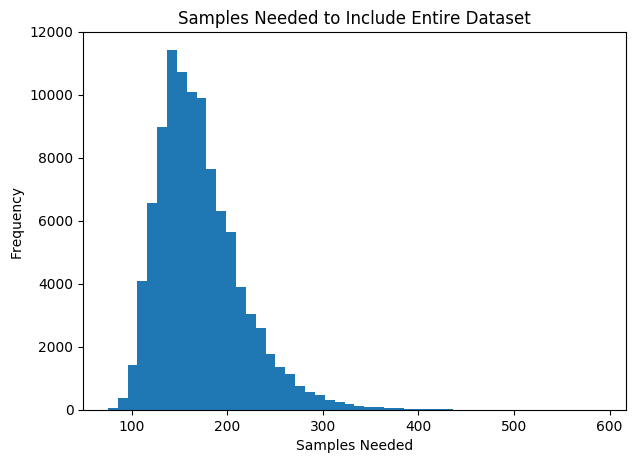

In [64]:
with open(os.getcwd()+"/num_iterations_list.pickle.dat", "rb") as input_file:
    num_iterations_list = pickle.load(input_file)
plt.hist(num_iterations_list, bins=50)
plt.gca().set(title='Samples Needed to Include Entire Dataset', ylabel='Frequency', xlabel='Samples Needed');

In [32]:
# Mean 
sum(num_iterations_list) / len(num_iterations_list)

171

### Extra testing to see how many samples are needed for larger populations

In [62]:
# TEST HOW MANY SAMPLES NEEDED TO SAMPLE EVERY ITEM

num_tests = 1000 # number of tests per population size
avg_iterations_list = [] # holds the average across all tests for each population size
population_range = range(2,2000,100) # the population sizes to test

# for each population size
for num_objs in population_range:
    x = [i for i in range(num_objs)] # list to sample from
    avg_iterations = 0 
    # for each test to run
    for _ in range(num_tests):
        sampled_count = [0 for _ in range(num_objs)] # vector to track which items have been sampled
        num_iterations = 0 
        # sample until all have been sampled
        while 0 in sampled_count:
            i1, i2 = sample(x,2)        
            sampled_count[i1] += 1
            sampled_count[i2] += 1            
            num_iterations += 1
        # update our count
        avg_iterations += num_iterations
    # compute the average and add to our list
    avg_iterations /= num_tests
    avg_iterations_list.append(avg_iterations)
    print "Pop Size: {} \t\tAvg Samples Needed: {}".format(num_objs, avg_iterations)
    

Pop Size: 2 	Avg iterations: 1
Pop Size: 102 	Avg iterations: 261
Pop Size: 202 	Avg iterations: 594
Pop Size: 302 	Avg iterations: 948
Pop Size: 402 	Avg iterations: 1324
Pop Size: 502 	Avg iterations: 1707
Pop Size: 602 	Avg iterations: 2087
Pop Size: 702 	Avg iterations: 2494
Pop Size: 802 	Avg iterations: 2895
Pop Size: 902 	Avg iterations: 3312
Pop Size: 1002 	Avg iterations: 3754
Pop Size: 1102 	Avg iterations: 4175
Pop Size: 1202 	Avg iterations: 4605
Pop Size: 1302 	Avg iterations: 5059
Pop Size: 1402 	Avg iterations: 5467
Pop Size: 1502 	Avg iterations: 5948
Pop Size: 1602 	Avg iterations: 6365
Pop Size: 1702 	Avg iterations: 6816
Pop Size: 1802 	Avg iterations: 7305
Pop Size: 1902 	Avg iterations: 7679


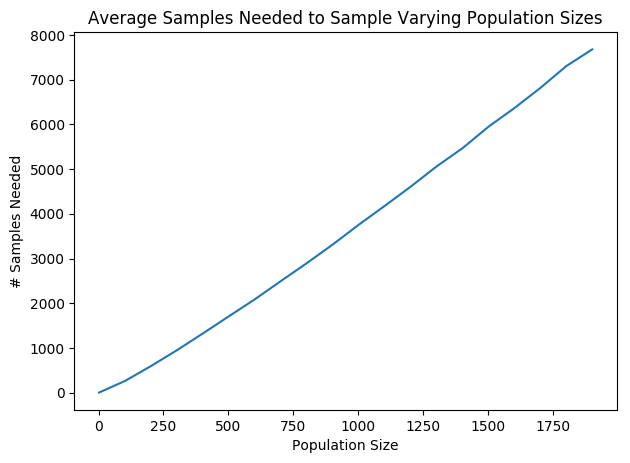

In [65]:
plt.plot(population_range, avg_iterations_list)

plt.gca().set(ylabel='# Samples Needed', xlabel='Population Size',
              title='Average Samples Needed to Sample Varying Population Sizes')
plt.show()